# AI & ML Internship                    Task-7
### By Elevate Labs

# 1.Load and prepare a dataset for binary classification.


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd


data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X_small = X[['mean radius', 'mean texture']] 

X_train, X_test, y_train, y_test = train_test_split(X_small, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 2.Train an SVM with linear and RBF kernel.


In [4]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_scaled, y_train)

svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_scaled, y_train)

print("Linear SVM Accuracy:", accuracy_score(y_test, svm_linear.predict(X_test_scaled)))
print("RBF SVM Accuracy:", accuracy_score(y_test, svm_rbf.predict(X_test_scaled)))


Linear SVM Accuracy: 0.9035087719298246
RBF SVM Accuracy: 0.9210526315789473


# 3.Visualize decision boundary using 2D data.


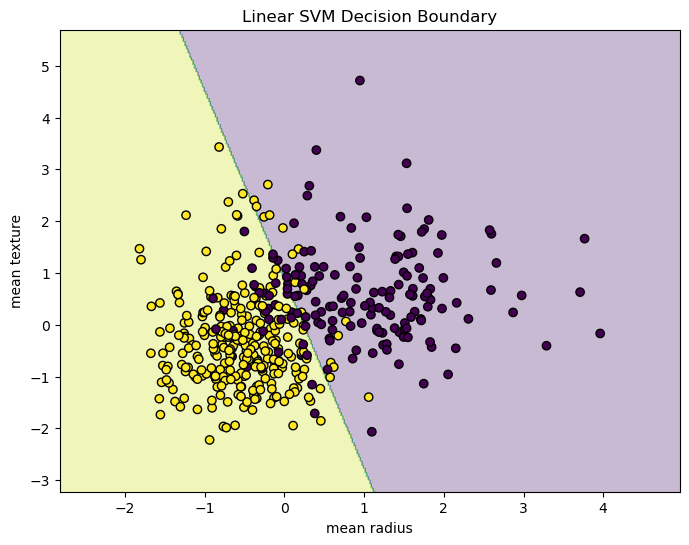

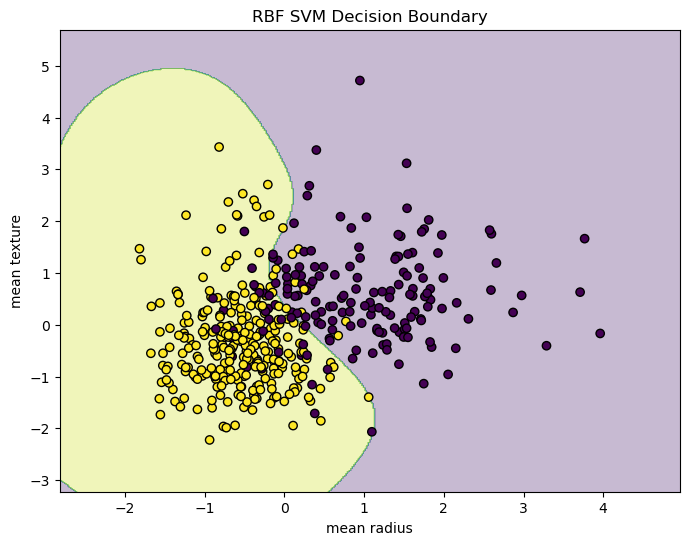

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def plot_decision_boundary(clf, X, y, title):
    X = np.array(X)
    h = .02       
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel("mean radius")
    plt.ylabel("mean texture")
    plt.show()


plot_decision_boundary(svm_linear, X_train_scaled, y_train, "Linear SVM Decision Boundary")
plot_decision_boundary(svm_rbf, X_train_scaled, y_train, "RBF SVM Decision Boundary")


# 4.Tune hyperparameters like C and gamma.


In [8]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}


grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Score:", grid.best_score_)


Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV Score: 0.9010989010989011


# 5.Use cross-validation to evaluate performance.


In [10]:
from sklearn.model_selection import cross_val_score


best_model = grid.best_estimator_

cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.89010989 0.91208791 0.95604396 0.87912088 0.86813187]
Mean CV Score: 0.9010989010989011
